# Workflow to study cell-type dependent structures

by Pu Zheng

2022.10.19

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

2584


In [57]:
# Required plotting setting
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _double_col_width, _font_size, _ticklabel_size,_ticklabel_width

from matplotlib import cm
#from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})   

## 0.1 Folders

In [12]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920'
# specifically for the first jupyter:
if not os.path.exists(postanalysis_folder):
    print(f"create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"use postanalysis_folder: {postanalysis_folder}")

# figure folder    
dark_mode = False
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0920_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0920')
print(figure_folder)

if not os.path.exists(figure_folder):
    print(f"create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"use figure_folder: {figure_folder}")
    
    

use postanalysis_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920
use figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920


In [13]:
median_figure_folder = os.path.join(figure_folder, 'Median_distmap')

if not os.path.exists(median_figure_folder):
    print(f"Create: {median_figure_folder}")
    os.makedirs(median_figure_folder)
else:
    print(f"Use: {median_figure_folder}")

variation_figure_folder = os.path.join(figure_folder, 'variation_distmap')

if not os.path.exists(variation_figure_folder):
    print(f"Create: {variation_figure_folder}")
    os.makedirs(variation_figure_folder)
else:
    print(f"Use: {variation_figure_folder}")

Create: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920\Median_distmap
Create: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_0920\Figures_0920\variation_distmap


## 0.2 Load major cell type dict

In [26]:
class_2_chr2ZxysList_filename = os.path.join(postanalysis_folder, 'class_2_chr2Zxys.pkl')
class_2_cellInfoList_filename = os.path.join(postanalysis_folder, 'class_2_cellInfo.pkl')

print("Loading")
class_2_chr2ZxysList = pickle.load(open(class_2_chr2ZxysList_filename, 'rb'))
class_2_cellInfoList = pickle.load(open(class_2_cellInfoList_filename, 'rb'))

Loading


In [4]:
# class to median distance dict
class_2_median_filename = os.path.join(postanalysis_folder, 'class_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))

In [6]:
class_2_medianDict.keys()

dict_keys(['Gluta', 'GABA', 'Astro', 'Endo', 'Micro', 'Oligo'])

## load codebook

In [20]:
import pandas as pd
from ImageAnalysis3.structure_tools import distance
# load codebook
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')
# partition by chr
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)## load codebook

# Scatter

In [8]:
sel_chr = '7'
sel_cls_1 = 'Gluta'
sel_cls_2 = 'Astro'

In [10]:
mat_1 = class_2_medianDict[sel_cls_1][f"cis_{sel_chr}"]
mat_2 = class_2_medianDict[sel_cls_2][f"cis_{sel_chr}"]

In [11]:
from sklearn.linear_model import LinearRegression
#run regression
X = mat_1[np.triu_indices_from(mat_1,1)][:,np.newaxis]
y = mat_2[np.triu_indices_from(mat_2,1)]
#sel_inds = np.where()
reg = LinearRegression(fit_intercept=False).fit(X, y)
#Returns the coefficient of determination R^2 of the prediction.
reg.score(X, y)
#0.9725287282456724

0.9108793740941336

<IPython.core.display.Javascript object>


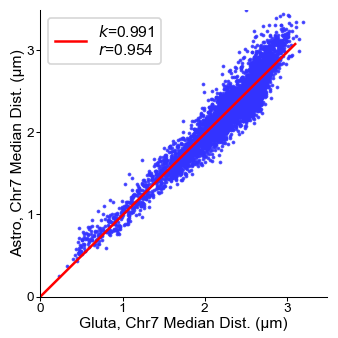

In [15]:
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=150)
ax.scatter(X[:,0], y, s=1, color=[0.2,0.2,1],#color=[0,0,0.5], 
           alpha=0.8)
line_x = np.arange(0, np.max(X), 0.1)
ax.plot(line_x[:,np.newaxis], reg.predict(line_x[:,np.newaxis]), 
        color='r', label=f'$k$={reg.coef_[0]:.3f}\n$r$={np.sqrt(reg.score(X, y)):.3f}')
ax.legend(fontsize=_font_size)

vmax = max(np.max(X), np.max(y))
ax.set_xlim([0, vmax])
ax.set_ylim([0, vmax])
ax.set_xticks(np.arange(0, vmax, 1))
ax.set_yticks(np.arange(0, vmax, 1))

ax.set_xlabel(f"{sel_cls_1}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"{sel_cls_2}, Chr{sel_chr} Median Dist."+' (\u03BCm)', fontsize=_font_size, labelpad=1)

ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
ax.spines["top"].set_visible(False) # remove top frame
ax.spines["right"].set_visible(False) #remove right frame

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.12, right=0.97, top=0.97, bottom=0.12)
plt.savefig(os.path.join(variation_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(variation_figure_folder, 
                         f"scatter_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [16]:
y_pred = reg.predict(X)
residual_mat = reg.predict(np.reshape(mat_1, -1)[:,np.newaxis]).reshape(mat_1.shape) - mat_2

<IPython.core.display.Javascript object>


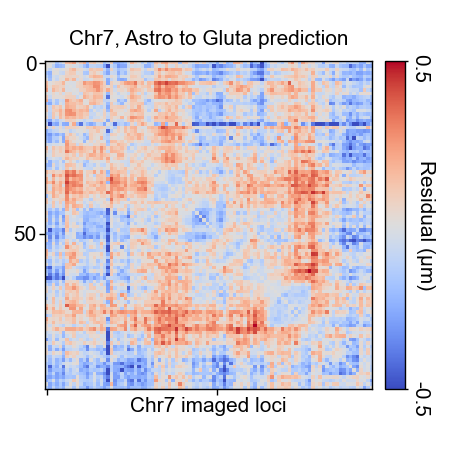

In [23]:
fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

# create a color map
#residual_cmap = cm.get_cmap('RdYlBu').copy()
residual_cmap = cm.get_cmap('coolwarm').copy()
residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = -0.5, 0.5

_pf = ax1.imshow(residual_mat, 
                 cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

ax1.set_title(f"Chr{sel_chr}, {sel_cls_2} to {sel_cls_1} prediction", fontsize=_font_size)
ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_yticklabels(_chr_names[:-1],)
ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
#ax1.set_xticklabels(_chr_names[:-1], rotation=45)

ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

ax1.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Residual (\u03BCm)', 
               fontsize=_font_size, labelpad=2, rotation=270)
cbar.ax.minorticks_off()
fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)
             
plt.savefig(os.path.join(variation_figure_folder, 
                         f"residual_heatmap_chr{sel_chr}_{sel_cls_1.replace('/','-').replace(' ','_')}-{sel_cls_2.replace('/','-').replace(' ','_')}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

## given chromosome, calculate pairwise correlation between subclasses

In [27]:
_celltype_order = ['Gluta', 'GABA', 'Astro', 'Oligo', 'Endo', 'Micro', ]

num_th = 500

sel_celltypes = [_c for _c in _celltype_order if len(class_2_chr2ZxysList[_c]) > num_th]


In [29]:
chr_2_correlationDf = {}
chr_2_slopeDf = {}
for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue
    correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
    slope_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
    for _cls_1 in _celltype_order:
        if len(class_2_chr2ZxysList[_cls_1]) < num_th:
            continue
        _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}']
        _reg_rs = []
        _reg_ks = []
        for _cls_2 in _celltype_order:
            _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}']
            if len(class_2_chr2ZxysList[_cls_2]) < num_th:
                continue
            #run regression
            X = _mat_1[np.triu_indices_from(_mat_1,1)]
            y = _mat_2[np.triu_indices_from(_mat_2,1)]
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            #print(np.sum(valid_inds), _cls_1)
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            #sel_inds = np.where()
            reg = LinearRegression(fit_intercept=False).fit(X, y)
            #Returns the coefficient of determination R^2 of the prediction.
            _r = np.sqrt(reg.score(X, y))
            _reg_rs.append(_r)
            _reg_ks.append(reg.coef_[0])
            
        correlation_dicts[_cls_1] = _reg_rs
        slope_dicts[_cls_1] = _reg_ks
    # append as DF
    correlation_df = pd.DataFrame(correlation_dicts).set_index('cell type')  
    chr_2_correlationDf[sel_chr] = correlation_df
    slope_df = pd.DataFrame(slope_dicts).set_index('cell type')  
    chr_2_slopeDf[sel_chr] = slope_df

<IPython.core.display.Javascript object>


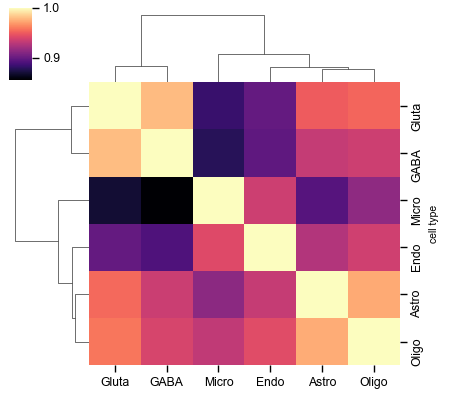

In [31]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(correlation_df.values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
sns.clustermap(chr_2_correlationDf['7'], col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma')

<IPython.core.display.Javascript object>


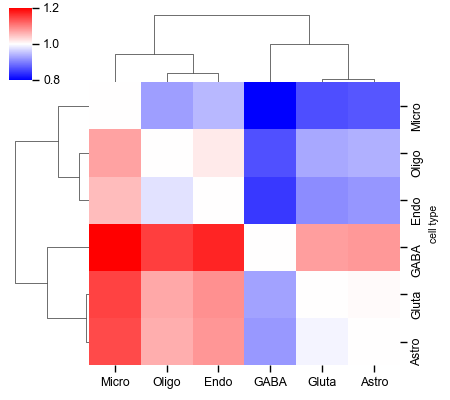

In [32]:
from scipy.cluster.hierarchy import linkage,dendrogram
_corr_lkg = linkage(chr_2_slopeDf['7'].values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
cluster_fig = sns.clustermap(chr_2_slopeDf['7'], col_linkage=_corr_lkg, row_linkage=_corr_lkg, figsize=(4.5,4),
               cmap='bwr', vmin=0.8, vmax=1.2)

In [33]:
average_correlation_df = pd.DataFrame(np.nanmean([_v for _v in chr_2_correlationDf.values()], axis=0),
                                      columns=correlation_df.columns)

average_correlation_df.index = correlation_df.index

<IPython.core.display.Javascript object>


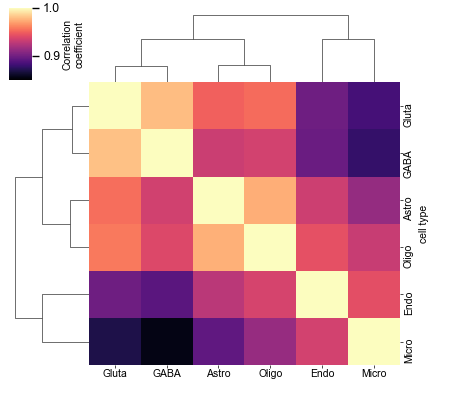

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/1509103985.py:17: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax])


In [36]:
from scipy.cluster.hierarchy import linkage,dendrogram
plot_chr = '7'
_corr_lkg = linkage(chr_2_correlationDf[plot_chr].values, method='median')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.85,1
ax = sns.clustermap(chr_2_correlationDf[plot_chr], 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='magma', vmin=vmin, vmax=vmax)
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax])
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Correlation\ncoefficient', labelpad=2, fontsize=_font_size)
plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(variation_figure_folder, f"Correlation_median_heatmap_Chr{plot_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [37]:
average_slope_df = pd.DataFrame(np.nanmean([_v for _v in chr_2_slopeDf.values()], axis=0),
                                      columns=slope_df.columns)

average_slope_df.index = slope_df.index

<IPython.core.display.Javascript object>


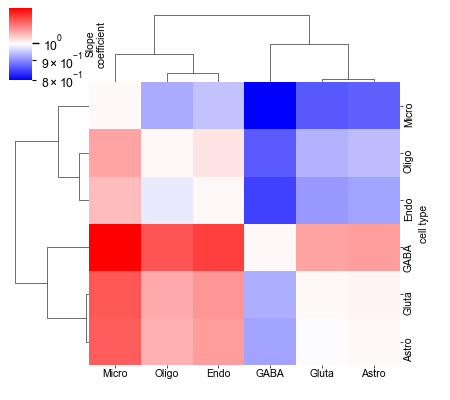

C:\Users\puzheng\AppData\Local\Temp/ipykernel_2584/412444944.py:19: UserWarning: Use the colorbar set_ticks() method instead.
  ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)


In [46]:
from scipy.cluster.hierarchy import linkage,dendrogram
from matplotlib.colors import LogNorm

plot_chr = '7'
_corr_lkg = linkage(chr_2_slopeDf[plot_chr].values, method='weighted')
#_dg = dendrogram(_corr_lkg)
#plt.figure()
vmin,vmax = 0.8, 1.25
ax = sns.clustermap(chr_2_slopeDf[plot_chr], 
               col_linkage=_corr_lkg, row_linkage=_corr_lkg, 
               figsize=(4.5,4), cmap='bwr', vmin=vmin, vmax=vmax, norm=LogNorm())
ax.ax_heatmap.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.ax_heatmap.spines.items()]

x0, _y0, _w, _h = ax.cbar_pos
#ax.ax_cbar.set_position([0.24, 0.9, 0.5, 0.03])
ax.ax_cbar.set_yticks([vmin, vmax], minorticks=False)
ax.ax_cbar.tick_params(axis='x', length=1, labelsize=_font_size)
ax.ax_cbar.set_ylabel('Slope\ncoefficient', labelpad=2, fontsize=_font_size)
plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.pdf"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.savefig(os.path.join(variation_figure_folder, f"slope_median_heatmap_Chr{plot_chr}.png"),
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [78]:
#sel_chr = '5'#'7'
num_th = 500

chr_2_class_variation_mat = {}
chr_2_residual_mats = {}
for sel_chr in chr_2_indices:
    if sel_chr in ['Y']:
        continue
        
    residual_mats = []
    correlation_dicts = {'cell type':[_cls for _cls in _celltype_order if len(class_2_chr2ZxysList[_cls]) >= num_th]}
    for _cls_1 in _celltype_order:
        if len(class_2_chr2ZxysList[_cls_1]) < num_th:
            continue
        _mat_1 = class_2_medianDict[_cls_1][f'cis_{sel_chr}']
        _reg_rs = []
        for _cls_2 in _celltype_order:
            _mat_2 = class_2_medianDict[_cls_2][f'cis_{sel_chr}']
            if len(class_2_chr2ZxysList[_cls_2]) < num_th:
                continue
            #run regression
            X = _mat_1[np.triu_indices_from(_mat_1,1)]
            y = _mat_2[np.triu_indices_from(_mat_2,1)]
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            #print(np.sum(valid_inds), _cls_1)
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            #sel_inds = np.where()
            reg = LinearRegression(fit_intercept=False).fit(X, y)
            #Returns the coefficient of determination R^2 of the prediction.
            _r = np.sqrt(reg.score(X, y))
            _reg_rs.append(_r)
            # residual
            #y_pred = reg.predict(X)
            _valid_mat1 = _mat_1[np.isfinite(_mat_1)]
            _pred_valid_mat1 = reg.predict(_valid_mat1[:,np.newaxis])
            _pred_mat1 = np.ones_like(_mat_1) * np.nan
            _pred_mat1[np.isfinite(_mat_1)] = _pred_valid_mat1
            # residual
            _rmat = _pred_mat1 - _mat_2
            # append
            residual_mats.append(_rmat)
        correlation_dicts[_cls_1] = _reg_rs
    correlation_df = pd.DataFrame(correlation_dicts).set_index('cell type')    

    residual_mats = np.array(residual_mats)
    residual_mats = residual_mats.reshape(len(sel_celltypes),len(sel_celltypes), 
                                          residual_mats.shape[-2],residual_mats.shape[-1],  )

    # calculate variational mat
    class_variation_mat = np.nanstd(residual_mats[np.triu_indices(len(sel_celltypes),1)], axis=0)
    chr_2_class_variation_mat[sel_chr] = class_variation_mat
    chr_2_residual_mats[sel_chr] = residual_mats

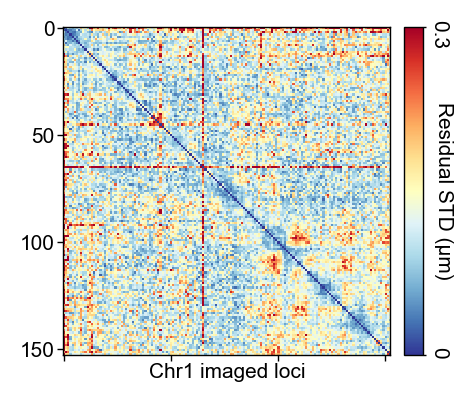

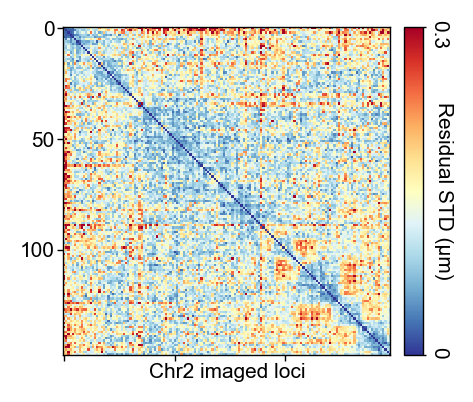

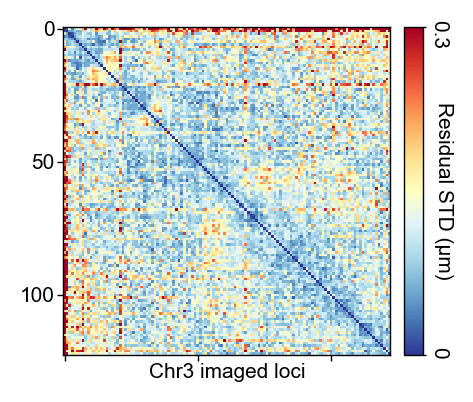

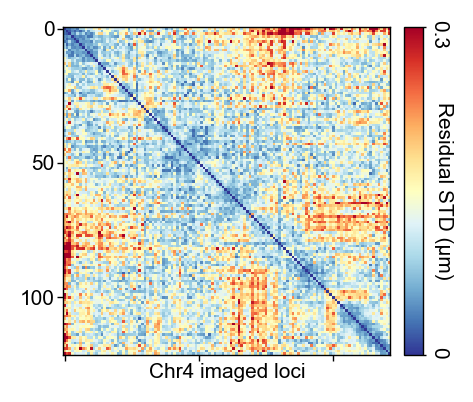

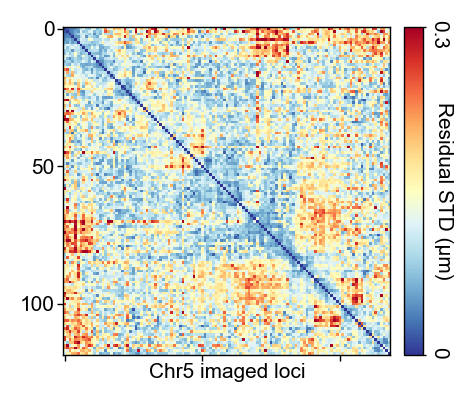

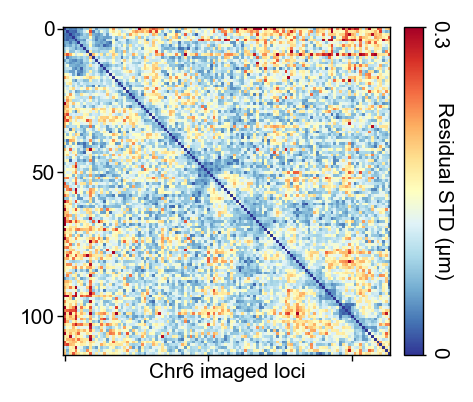

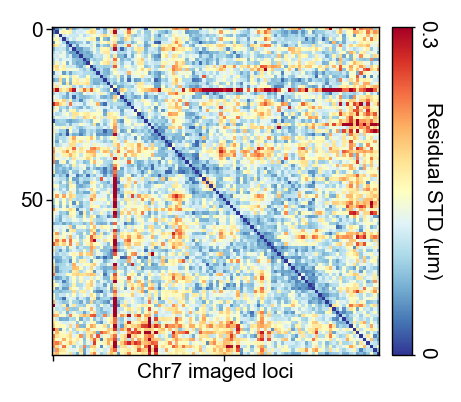

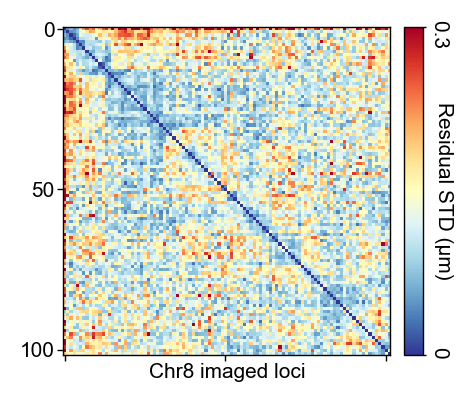

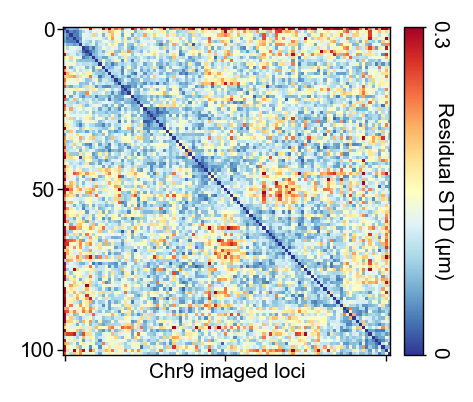

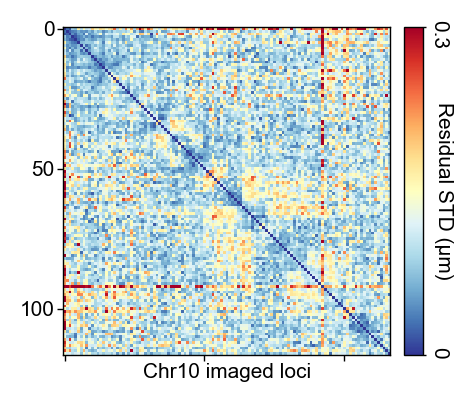

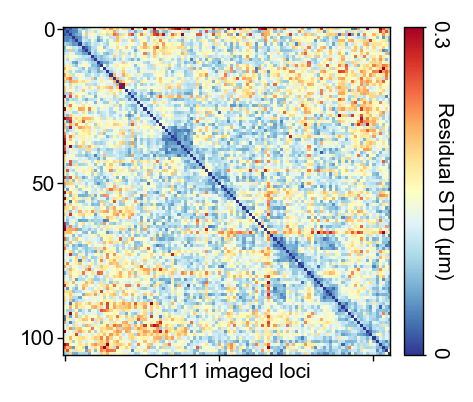

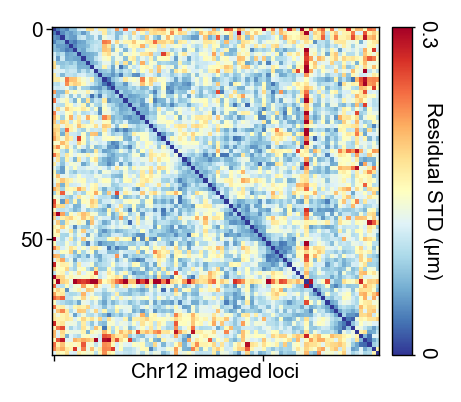

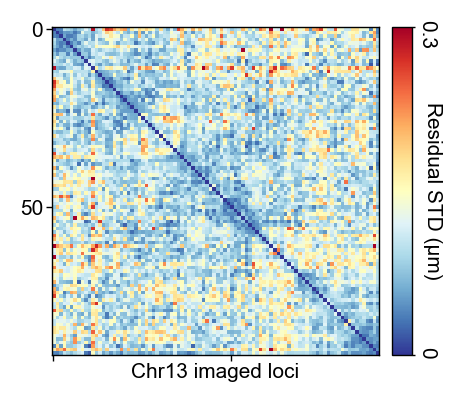

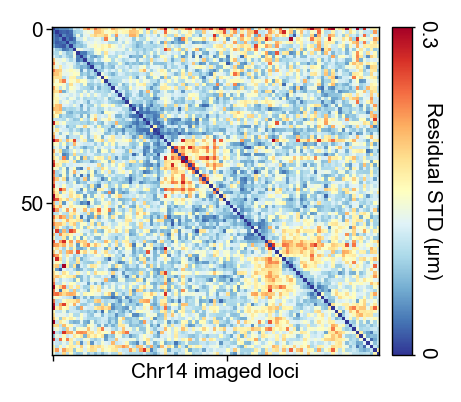

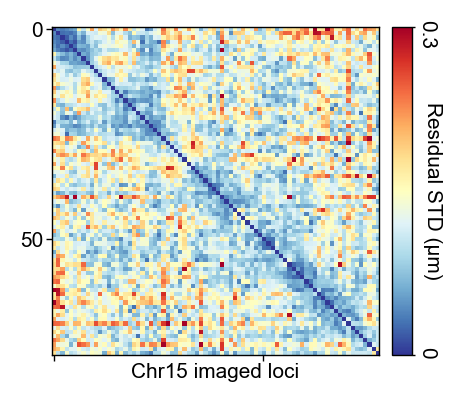

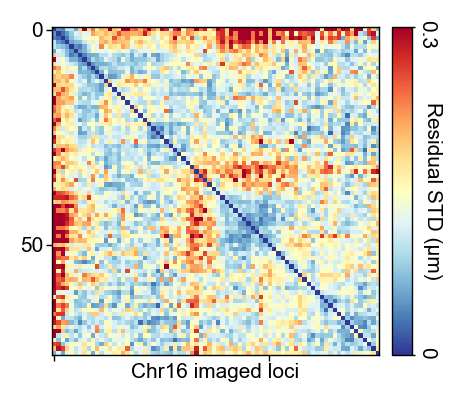

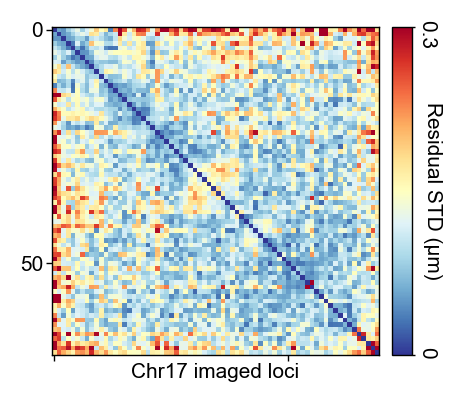

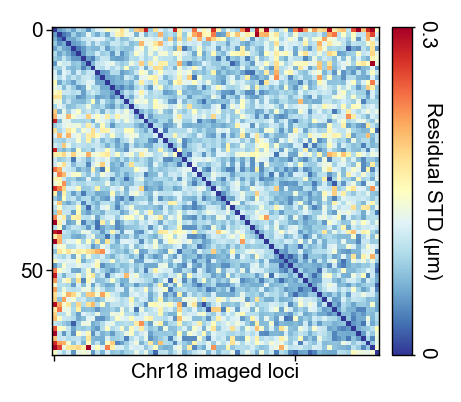

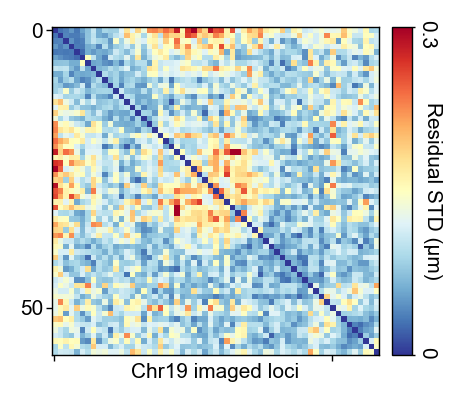

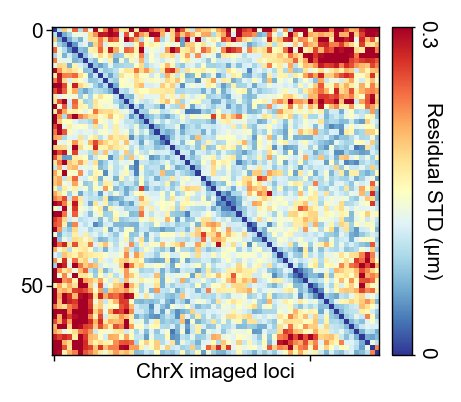

In [58]:

for sel_chr, class_variation_mat in chr_2_class_variation_mat.items():
    # plot
    fig, ax1 = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

    # create a color map
    residual_cmap = cm.get_cmap('RdYlBu_r').copy()
    residual_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0, 0.3

    _pf = ax1.imshow(class_variation_mat, 
                     cmap=residual_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    #ax1.set_title(f"Chr{sel_chr}, standard deviation of residuals", fontsize=_font_size)
    ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size, labelpad=3)
    ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
    #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
    ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

    ax1.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Residual STD (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()
    fig.subplots_adjust(wspace=0.05, hspace=0.2, left=0.1, right=0.9, top=0.9, bottom=0.1)

    plt.savefig(os.path.join(variation_figure_folder, f"variation_residual_heatmap_chr{sel_chr}.pdf"),
                transparent=True, bbox_inches='tight', dpi=300)
    plt.savefig(os.path.join(variation_figure_folder, f"variation_residual_heatmap_chr{sel_chr}.png"),
                transparent=True, bbox_inches='tight', dpi=300)
    plt.show()

In [61]:
test_mat = np.corrcoef(chr_2_class_variation_mat['7'])

In [96]:
test_mat = np.nanmean(chr_2_residual_mats['7'][np.triu_indices(len(sel_celltypes),1)], axis=0)

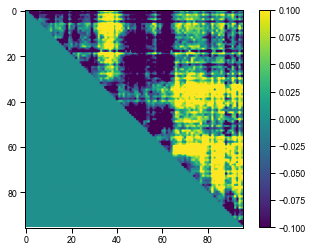

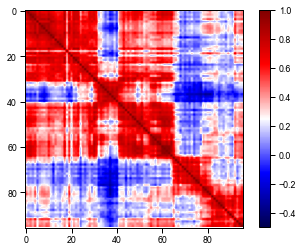

In [120]:
plt.figure()
plt.imshow(np.triu(test_mat,1), vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.figure()
plt.imshow(np.corrcoef(test_mat), vmin=-0.5, vmax=1, cmap='seismic')
plt.colorbar()

In [121]:
test_mat = np.nanmean(chr_2_residual_mats['7'][np.tril_indices(len(sel_celltypes),1)], axis=0)

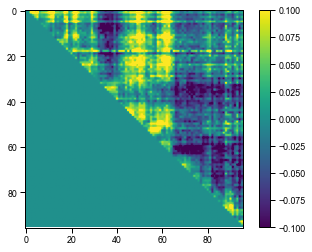

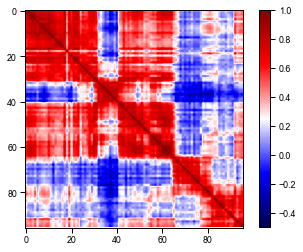

In [122]:
plt.figure()
plt.imshow(np.triu(test_mat,1), vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.figure()
plt.imshow(np.corrcoef(test_mat), vmin=-0.5, vmax=1, cmap='seismic')
plt.colorbar()

## moving average

array([[ 0.        , -0.0398777 , -0.13288982, ..., -0.14163946,
         0.07297334,  0.08591374],
       [ 0.        ,  0.        , -0.2165871 , ..., -0.06184442,
        -0.03024835, -0.06231615],
       [ 0.        ,  0.        ,  0.        , ..., -0.00148214,
         0.0522686 ,  0.01938505],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.14174374, -0.19903237],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.12472706],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [110]:
def moving_cube_along_diagonal(_mat, cube_size=5):
    _chr_size = len(_mat)
    _moving_cubes = []
    for _i in range(_chr_size-cube_size):
        _cube = _mat[_i:_i+cube_size, _i:_i+cube_size]
        #_cube = np.triu(_cube,1)
        _moving_cubes.append(np.mean(_cube[np.tril_indices(cube_size, 1)]))
    
    return _moving_cubes

In [114]:
sel_chr = '7'

In [117]:
diagonal_variations = {}
for _window_size in [2,4,6]:
    diagonal_variations[_window_size] = moving_cube_along_diagonal(chr_2_class_variation_mat[sel_chr], _window_size)

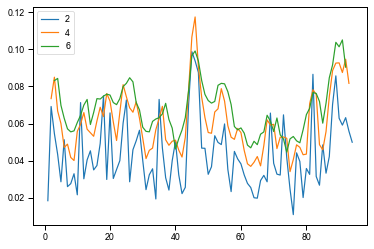

In [119]:
plt.figure()
for _window_size, _diagonal_vars in diagonal_variations.items():
    plt.plot(np.arange(_window_size/2, len(chr_2_class_variation_mat[sel_chr])-_window_size/2),
             _diagonal_vars,
             label=f"{_window_size}",
            )
plt.legend()
plt.show()